In [193]:
import os
import numpy as np
import pandas as pd
import random
from scipy.stats import pearsonr
import seaborn as sns

In [194]:
os.chdir('F:\env_parameter')

In [195]:
adj_df = pd.read_csv('adj_df.csv')
pred_LE = pd.read_csv('F:\knp big area\\season_mol_pred_LE.csv')
pred_LE.drop('date', axis = 1, inplace = True)

In [196]:
df = pd.concat([adj_df,pred_LE], axis = 1)
df.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [197]:
df_A = df.iloc[:900,1:].reset_index(drop = True)
df_B = df.iloc[900:,3:-1].reset_index(drop = True)
df_B

,adj_Psurf,adj_wind,adj_DSWRF,adj_VPD,DoY
0,99348.874609,0.372676,148.891461,36.388924,209
1,99081.375072,0.402330,195.066731,42.435140,217
2,99549.455015,0.461533,207.849867,37.884019,225
3,99489.450164,0.389859,204.348249,40.382083,233
4,99391.733955,0.382412,182.247882,39.497547,241
...,...,...,...,...,...
107,101228.751193,0.368941,153.183640,21.559373,329
108,101296.562534,0.481858,121.864007,23.168795,337
109,101336.367087,0.478531,124.024239,19.435718,345
110,101233.298735,0.476233,123.366070,17.848316,353


In [198]:
df_A.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   adj_Tair   900 non-null    float64
 1   adj_DLWRF  900 non-null    float64
 2   adj_Psurf  900 non-null    float64
 3   adj_wind   900 non-null    float64
 4   adj_DSWRF  900 non-null    float64
 5   adj_VPD    900 non-null    float64
 6   DoY        900 non-null    int64  
 7   pred_LE    900 non-null    float64
dtypes: float64(7), int64(1)
memory usage: 56.4 KB


In [199]:
df_B.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   adj_Psurf  112 non-null    float64
 1   adj_wind   112 non-null    float64
 2   adj_DSWRF  112 non-null    float64
 3   adj_VPD    112 non-null    float64
 4   DoY        112 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 4.5 KB


In [200]:
df.columns[3:-1]

Index(['adj_Psurf', 'adj_wind', 'adj_DSWRF', 'adj_VPD', 'DoY'], dtype='object')

In [201]:
df_B.columns = ['A','B','C','D','E']
df_B

,A,B,C,D,E
0,99348.874609,0.372676,148.891461,36.388924,209
1,99081.375072,0.402330,195.066731,42.435140,217
2,99549.455015,0.461533,207.849867,37.884019,225
3,99489.450164,0.389859,204.348249,40.382083,233
4,99391.733955,0.382412,182.247882,39.497547,241
...,...,...,...,...,...
107,101228.751193,0.368941,153.183640,21.559373,329
108,101296.562534,0.481858,121.864007,23.168795,337
109,101336.367087,0.478531,124.024239,19.435718,345
110,101233.298735,0.476233,123.366070,17.848316,353


In [202]:
df_A

,adj_Tair,adj_DLWRF,adj_Psurf,adj_wind,adj_DSWRF,adj_VPD,DoY,pred_LE
0,286.756644,319.162893,100539.977653,0.497139,146.224056,15.262452,1,20.759853
1,288.252330,342.581831,100439.857883,0.512361,141.563438,16.771903,9,23.956562
2,288.082677,347.065169,100576.263039,0.463955,137.346168,16.482185,17,25.472913
3,287.959171,334.363068,100775.430660,0.475051,146.402547,16.540609,25,25.937268
4,288.031696,352.723012,100541.813522,0.474345,136.981638,16.364479,33,27.744646
...,...,...,...,...,...,...,...,...
895,301.790032,447.192748,99388.470828,0.425263,197.636143,38.878759,169,82.847098
896,300.999453,449.815718,99143.228040,0.374883,167.991993,37.140876,177,85.065673
897,300.394635,451.292305,99110.521254,0.432166,137.257800,35.723266,185,82.526429
898,300.317911,444.170372,99286.154898,0.404908,165.256138,35.642401,193,76.992865


In [203]:
ind = random.sample(list(np.arange(len(df_A))),112)
s_df = df_A.iloc[ind].reset_index(drop = True)
s_df

,adj_Tair,adj_DLWRF,adj_Psurf,adj_wind,adj_DSWRF,adj_VPD,DoY,pred_LE
0,294.577794,365.382157,100503.993161,0.372921,172.251229,25.507673,305,55.874163
1,292.177432,369.274820,100364.830516,0.375045,159.027782,21.683844,329,50.344825
2,300.450914,442.722572,99510.628307,0.399478,173.790324,35.854072,169,80.613724
3,292.064108,361.813993,100568.022780,0.377332,162.415834,21.535316,329,47.002358
4,298.965586,444.426023,99506.355478,0.398038,129.753953,32.743242,201,85.171333
...,...,...,...,...,...,...,...,...
107,291.244596,360.333104,100317.171089,0.455873,129.659922,20.406154,337,42.358659
108,289.727000,343.013456,100765.416943,0.464093,139.450643,18.542921,337,39.038876
109,298.121579,403.678635,100332.503467,0.382425,174.515854,31.411096,289,63.588647
110,297.483789,413.904182,99992.469129,0.470320,174.543364,30.159734,121,89.112989


In [204]:
m_df = pd.concat([s_df,df_B], axis = 1)
m_df

,adj_Tair,adj_DLWRF,adj_Psurf,adj_wind,adj_DSWRF,adj_VPD,DoY,pred_LE,A,B,C,D,E
0,294.577794,365.382157,100503.993161,0.372921,172.251229,25.507673,305,55.874163,99348.874609,0.372676,148.891461,36.388924,209
1,292.177432,369.274820,100364.830516,0.375045,159.027782,21.683844,329,50.344825,99081.375072,0.402330,195.066731,42.435140,217
2,300.450914,442.722572,99510.628307,0.399478,173.790324,35.854072,169,80.613724,99549.455015,0.461533,207.849867,37.884019,225
3,292.064108,361.813993,100568.022780,0.377332,162.415834,21.535316,329,47.002358,99489.450164,0.389859,204.348249,40.382083,233
4,298.965586,444.426023,99506.355478,0.398038,129.753953,32.743242,201,85.171333,99391.733955,0.382412,182.247882,39.497547,241
...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,291.244596,360.333104,100317.171089,0.455873,129.659922,20.406154,337,42.358659,101228.751193,0.368941,153.183640,21.559373,329
108,289.727000,343.013456,100765.416943,0.464093,139.450643,18.542921,337,39.038876,101296.562534,0.481858,121.864007,23.168795,337
109,298.121579,403.678635,100332.503467,0.382425,174.515854,31.411096,289,63.588647,101336.367087,0.478531,124.024239,19.435718,345
110,297.483789,413.904182,99992.469129,0.470320,174.543364,30.159734,121,89.112989,101233.298735,0.476233,123.366070,17.848316,353


In [205]:
df.columns[3:-1]

Index(['adj_Psurf', 'adj_wind', 'adj_DSWRF', 'adj_VPD', 'DoY'], dtype='object')

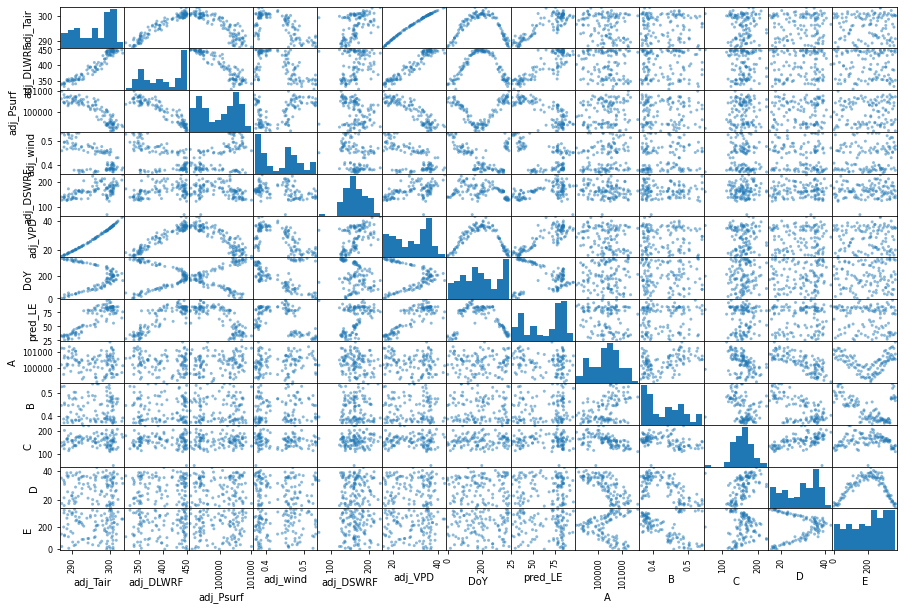

In [170]:
from pandas.plotting import scatter_matrix
scatter_matrix(m_df, figsize = (15,10))
plt.show()

In [206]:
m_df.describe()

,adj_Tair,adj_DLWRF,adj_Psurf,adj_wind,adj_DSWRF,adj_VPD,DoY,pred_LE,A,B,C,D,E
count,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000
mean,296.207416,402.346510,99966.630864,0.434518,164.395483,28.822500,196.000000,64.558787,100303.635589,0.431025,157.526186,29.080872,199.571429
std,4.664806,40.145577,517.943408,0.048556,26.808840,7.642235,103.609106,22.319104,571.716656,0.051346,25.516286,7.536756,106.458613
min,286.817032,323.000630,98997.751733,0.366455,86.519448,15.269391,1.000000,20.000000,99081.375072,0.365245,51.693647,15.013900,1.000000
25%,292.103071,363.913304,99502.223089,0.383642,141.248714,21.792716,121.000000,42.567294,99887.125475,0.383669,139.210993,22.604102,111.000000
50%,297.725700,413.874615,99926.248545,0.436076,163.725376,30.748725,185.000000,74.015136,100372.462642,0.421810,158.359872,30.594191,217.000000
75%,300.354584,441.758231,100423.672287,0.473024,183.078021,35.593117,291.000000,84.380589,100730.041088,0.474639,172.804450,35.510898,289.000000
max,303.112428,451.292305,101002.354122,0.534681,224.698819,42.146528,361.000000,96.965453,101638.316959,0.541485,223.265321,42.435140,361.000000


Pearson correlation coefficient

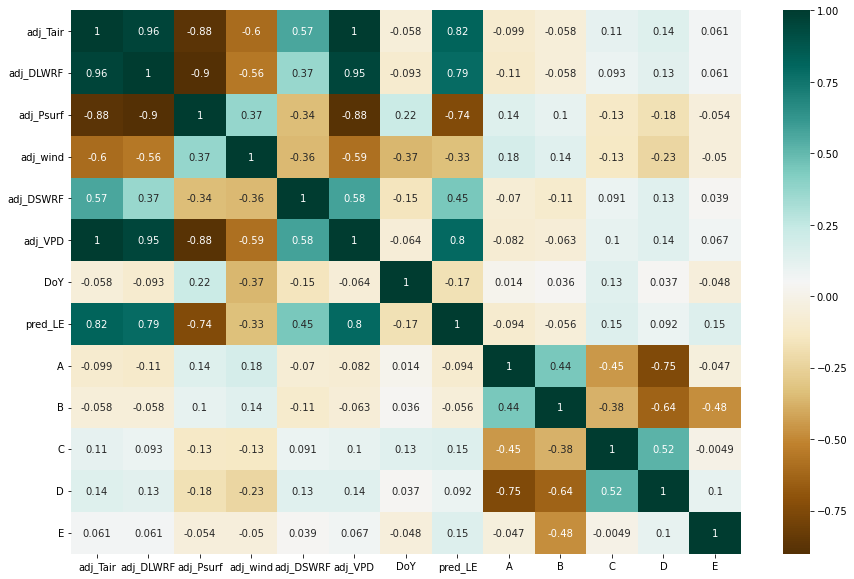

In [207]:
plt.figure(figsize = (15,10))
corr_matrix = m_df.corr()
sns.heatmap(corr_matrix, annot = True, cmap = 'BrBG')
plt.show()

spearmanr correlation

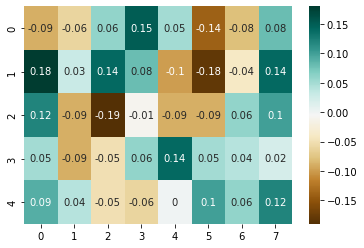

In [208]:
from scipy.stats import spearmanr
r = []
for col in s_df.columns:
    for col_ in df_B:
        corr, _ = spearmanr(df_B[col_].values, s_df[col].values)
        r.append(corr)
m = np.round(np.array(r).reshape(5,8),2)
sns.heatmap(m, annot = True, cmap = 'BrBG')
plt.show()

P-value

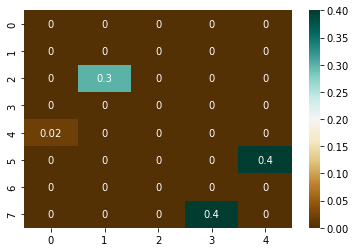

In [210]:
from scipy import stats
r = []
for data1 in df_B.columns:
    mean1 = df_B[data1].values.mean()
    std1 = df_B[data1].values.std()
    n1 = len(df_B[data1])
    for data2 in s_df.columns:
        mean2 = s_df[data2].values.mean()
        std2 = s_df[data2].values.std()
        n2 = len(s_df[data2])
        deg_f = n1 + n2 - 2
        t = (mean1 - mean2) / np.sqrt((std1**2 / n1) + (std2**2 / n2))
        p = stats.t.sf(np.abs(t), deg_f)
        r.append(p)
        
m = np.round(np.array(r).reshape(8,5),2)
sns.heatmap(m, annot = True, cmap = 'BrBG')
plt.show()